# Project Resources

[GitHub Repository](https://github.com/Iamnavodyajain/canvas_analytics_project)

<a href="https://drive.google.com/file/d/19NzsicYkBuIO-Ul4mSfgy2yAJ3QOGdcg/view?usp=sharing" target="_blank" rel="noopener noreferrer"><button style="background:#4CAF50;color:white;padding:8px 12px;border-radius:6px;border:none;cursor:pointer">Google Drive — Dataset</button></a>

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

print("Notebook ready.")



Notebook ready.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

# Load datasets
users = pd.read_csv("../data/users.csv", parse_dates=["signup_date", "last_active_date", "first_activation_date", "churn_date"])
events = pd.read_csv("../data/user_journey_events.csv", parse_dates=["event_timestamp", "event_date"])
daily = pd.read_csv("../data/daily_user_activity.csv", parse_dates=["date"])
subs = pd.read_csv("../data/subscriptions_payments.csv", parse_dates=["subscription_start", "subscription_end"])
referrals = pd.read_csv("../data/referrals.csv", parse_dates=["referral_sent_date", "referral_accepted_date"])
designs = pd.read_csv("../data/designs_features.csv", parse_dates=["created_at"])
experiments = pd.read_csv("../data/experiments_ab_tests.csv", parse_dates=["assigned_date"])

print("All datasets loaded successfully!")


C:\Users\Navodya\AppData\Local\Temp\ipykernel_3664\521084963.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  users = pd.read_csv("../data/users.csv", parse_dates=["signup_date", "last_active_date", "first_activation_date", "churn_date"])
C:\Users\Navodya\AppData\Local\Temp\ipykernel_3664\521084963.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  users = pd.read_csv("../data/users.csv", parse_dates=["signup_date", "last_active_date", "first_activation_date", "churn_date"])


All datasets loaded successfully!


In [3]:
print("Total Users:", users.shape[0])
print("\nUser Status Breakdown:")
display(users['status'].value_counts())

print("\nPersona Distribution:")
display(users['persona_type'].value_counts())

print("\nAcquisition Channels:")
display(users['acquisition_channel'].value_counts())

print("\nDevice Split:")
display(users['device_primary'].value_counts())


Total Users: 10000

User Status Breakdown:


status
Active         6033
Dormant        2020
Churned        1472
Reactivated     475
Name: count, dtype: int64


Persona Distribution:


persona_type
Student               2985
SocialMediaManager    2467
Creator               2443
SMBOwner              2105
Name: count, dtype: int64


Acquisition Channels:


acquisition_channel
Organic       3958
SEO           1965
Referral      1562
PaidSocial    1505
Email         1010
Name: count, dtype: int64


Device Split:


device_primary
Web        4455
Android    3581
iOS        1964
Name: count, dtype: int64

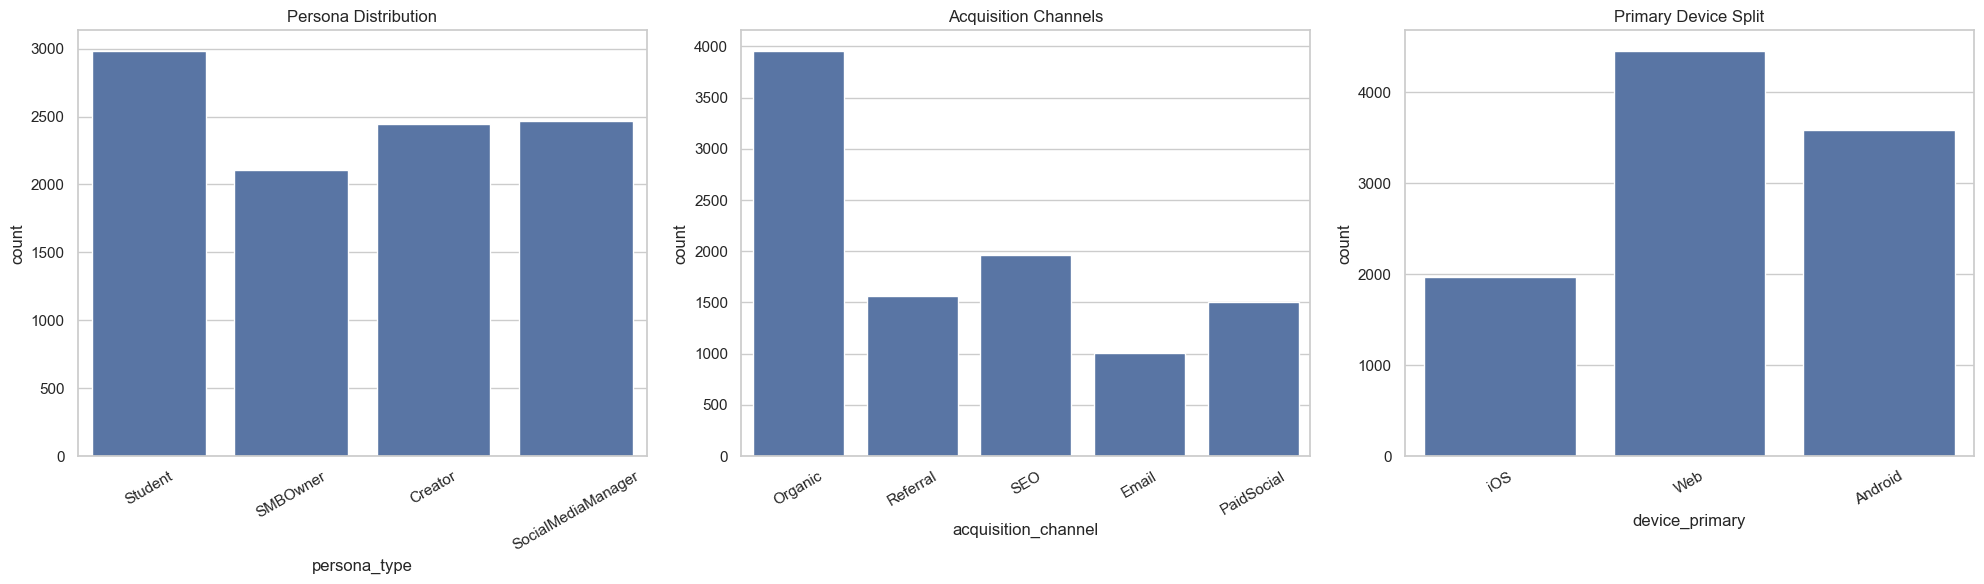

In [4]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

sns.countplot(data=users, x='persona_type', ax=axes[0])
axes[0].set_title("Persona Distribution")
axes[0].tick_params(axis='x', rotation=30)

sns.countplot(data=users, x='acquisition_channel', ax=axes[1])
axes[1].set_title("Acquisition Channels")
axes[1].tick_params(axis='x', rotation=30)

sns.countplot(data=users, x='device_primary', ax=axes[2])
axes[2].set_title("Primary Device Split")
axes[2].tick_params(axis='x', rotation=30)

plt.tight_layout()
plt.show()


In [5]:
persona_channel_matrix = pd.crosstab(users['persona_type'], users['acquisition_channel'])
persona_channel_matrix


acquisition_channel,Email,Organic,PaidSocial,Referral,SEO
persona_type,,,,,
Creator,243,973,347,388,492
SMBOwner,211,840,315,325,414
SocialMediaManager,258,974,372,363,500
Student,298,1171,471,486,559


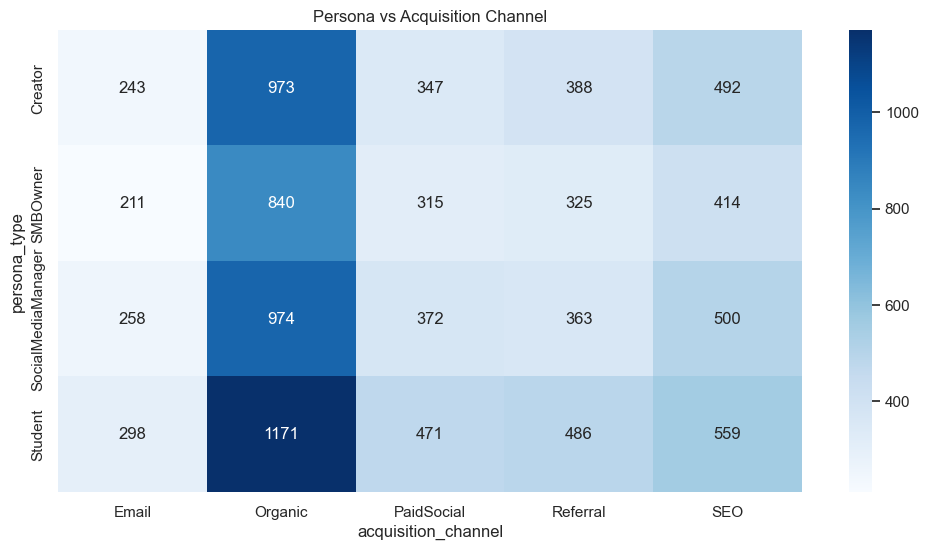

In [6]:
plt.figure(figsize=(12,6))
sns.heatmap(persona_channel_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Persona vs Acquisition Channel")
plt.show()


In [7]:
persona_device_matrix = pd.crosstab(users['persona_type'], users['device_primary'])
persona_device_matrix


device_primary,Android,Web,iOS
persona_type,,,
Creator,873,1104,466
SMBOwner,724,940,441
SocialMediaManager,894,1083,490
Student,1090,1328,567


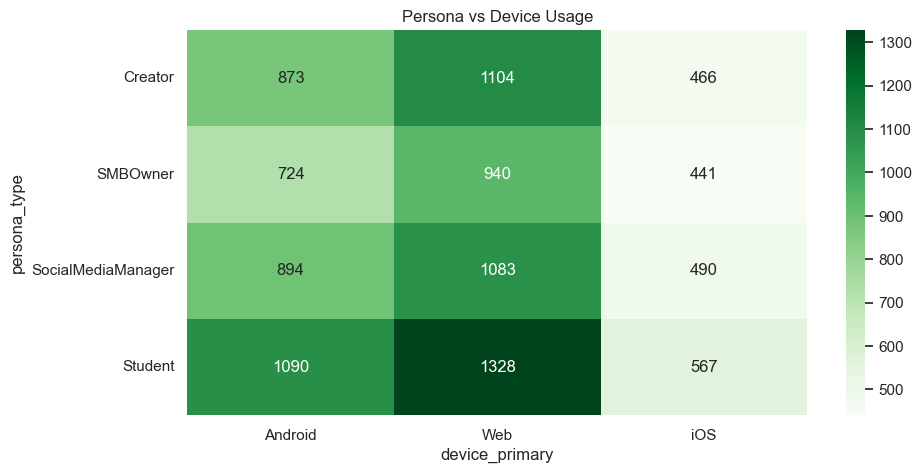

In [8]:
plt.figure(figsize=(10,5))
sns.heatmap(persona_device_matrix, annot=True, fmt='d', cmap='Greens')
plt.title("Persona vs Device Usage")
plt.show()


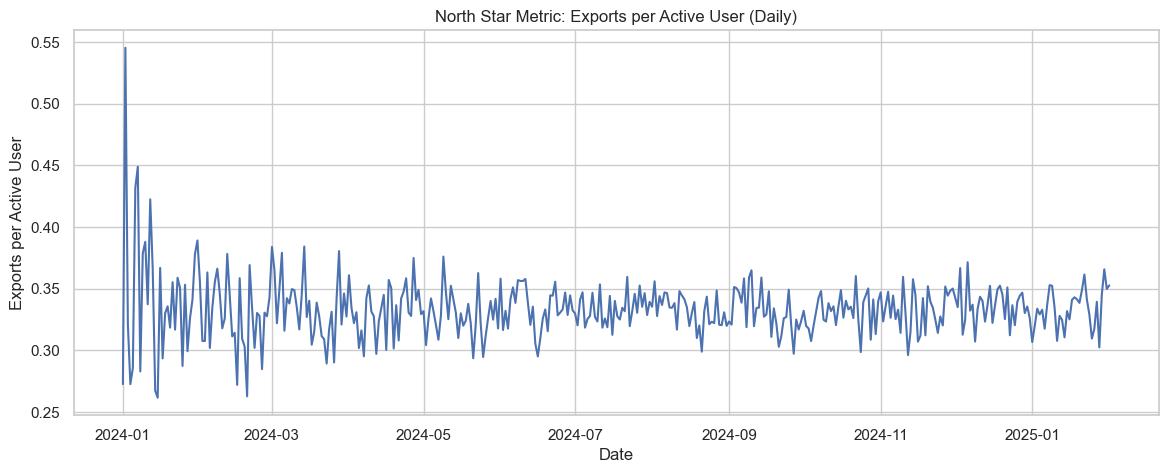

In [9]:
nsm_daily = (
    daily.groupby("date")["designs_exported"].sum() /
    daily.groupby("date")["user_id"].nunique()
)

plt.figure(figsize=(14, 5))
plt.plot(nsm_daily.index, nsm_daily.values)
plt.title("North Star Metric: Exports per Active User (Daily)")
plt.xlabel("Date")
plt.ylabel("Exports per Active User")
plt.show()


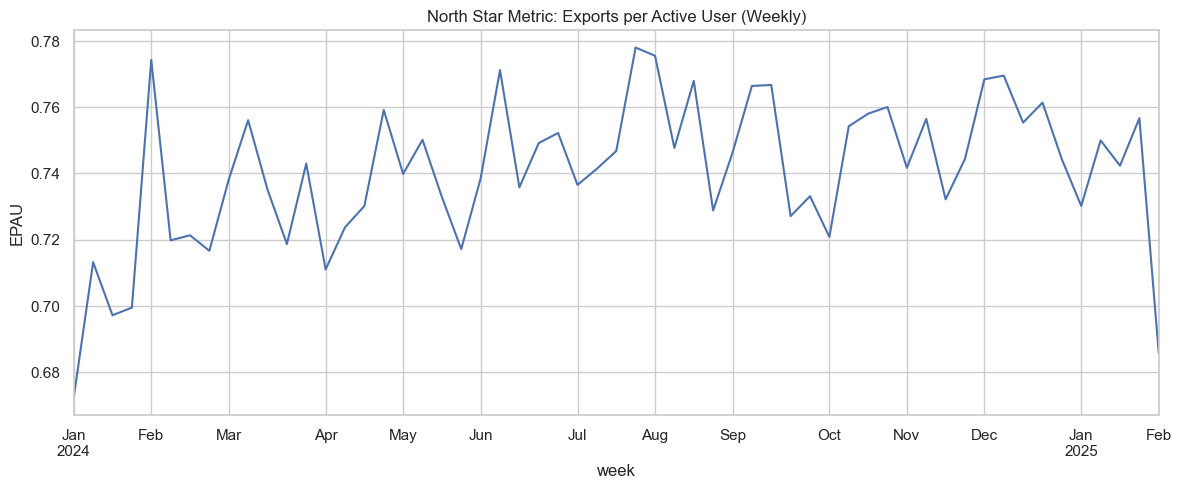

In [10]:
daily["week"] = daily["date"].dt.to_period("W")

nsm_weekly = (
    daily.groupby("week")["designs_exported"].sum() /
    daily.groupby("week")["user_id"].nunique()
)

nsm_weekly.plot(figsize=(14,5))
plt.title("North Star Metric: Exports per Active User (Weekly)")
plt.ylabel("EPAU")
plt.show()


In [11]:
funnel_steps = {
    "Signup": users.shape[0],
    "Onboarding Completed": events[events["event_name"] == "onboarding_completed"]["user_id"].nunique(),
    "First Design Created": events[events["event_name"] == "first_design_created"]["user_id"].nunique(),
    "Design Exported": events[events["event_name"] == "design_exported"]["user_id"].nunique(),
}

funnel_df = pd.DataFrame(funnel_steps, index=["Users"]).T
funnel_df


,Users
Signup,10000
Onboarding Completed,6476
First Design Created,6491
Design Exported,4158


In [12]:
funnel_df["Conversion Rate"] = funnel_df["Users"] / funnel_df.iloc[0]["Users"]
funnel_df


,Users,Conversion Rate
Signup,10000,1.0000
Onboarding Completed,6476,0.6476
First Design Created,6491,0.6491
Design Exported,4158,0.4158


In [13]:
activation_rate = users["first_activation_date"].notna().mean()
activation_rate


np.float64(0.6491)

In [14]:
print(f"{activation_rate:.2%}")


64.91%


In [15]:
activation_by_persona = (
    users.groupby("persona_type")["first_activation_date"]
    .apply(lambda x: x.notna().mean())
)

activation_by_persona


persona_type
Creator               0.638968
SMBOwner              0.755819
SocialMediaManager    0.813539
Student               0.446231
Name: first_activation_date, dtype: float64

In [16]:
activation_by_channel = (
    users.groupby("acquisition_channel")["first_activation_date"]
    .apply(lambda x: x.notna().mean())
)

activation_by_channel


acquisition_channel
Email         0.646535
Organic       0.646286
PaidSocial    0.661794
Referral      0.639565
SEO           0.653944
Name: first_activation_date, dtype: float64

In [17]:
activation_by_device = (
    users.groupby("device_primary")["first_activation_date"]
    .apply(lambda x: x.notna().mean())
)

activation_by_device


device_primary
Android    0.649818
Web        0.646914
iOS        0.652749
Name: first_activation_date, dtype: float64

In [18]:
users["signup_month"] = users["signup_date"].dt.to_period("M")
daily["activity_month"] = daily["date"].dt.to_period("M")

# Count user activity per month
activity = (
    daily.groupby(["user_id", "activity_month"])
    .size()
    .reset_index(name="active_days")
)

# Merge with signup month
cohort = users[["user_id", "signup_month"]].merge(activity, on="user_id")

# Month number since signup
cohort["month_number"] = (
    cohort["activity_month"] - cohort["signup_month"]
).apply(lambda x: x.n)


In [19]:
cohort_summary = (
    cohort.groupby(["signup_month", "month_number"])["user_id"]
    .nunique()
    .reset_index()
)

cohort_pivot = cohort_summary.pivot(
    index="signup_month",
    columns="month_number",
    values="user_id"
)

cohort_pivot


month_number,0,1,2,3,4,5,6,7,8,9,10,11,12
signup_month,,,,,,,,,,,,,
2024-01,681.0,737.0,675.0,598.0,541.0,470.0,423.0,345.0,298.0,237.0,158.0,92.0,22.0
2024-02,695.0,768.0,707.0,649.0,590.0,519.0,437.0,365.0,311.0,231.0,153.0,94.0,6.0
2024-03,713.0,787.0,723.0,660.0,600.0,529.0,449.0,372.0,314.0,244.0,174.0,23.0,NaN
2024-04,707.0,788.0,724.0,670.0,586.0,520.0,458.0,397.0,304.0,231.0,48.0,NaN,NaN
2024-05,672.0,726.0,669.0,602.0,535.0,462.0,397.0,345.0,291.0,59.0,NaN,NaN,NaN
2024-06,734.0,791.0,729.0,651.0,574.0,505.0,434.0,370.0,86.0,NaN,NaN,NaN,NaN
2024-07,750.0,800.0,734.0,662.0,591.0,505.0,448.0,95.0,NaN,NaN,NaN,NaN,NaN
2024-08,678.0,735.0,678.0,609.0,542.0,481.0,119.0,NaN,NaN,NaN,NaN,NaN,NaN
2024-09,657.0,731.0,659.0,612.0,543.0,121.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
cohort_retention = cohort_pivot.divide(cohort_pivot[0], axis=0)
cohort_retention


month_number,0,1,2,3,4,5,6,7,8,9,10,11,12
signup_month,,,,,,,,,,,,,
2024-01,1.0,1.082232,0.991189,0.878120,0.794420,0.690162,0.621145,0.506608,0.437592,0.348018,0.232012,0.135095,0.032305
2024-02,1.0,1.105036,1.017266,0.933813,0.848921,0.746763,0.628777,0.525180,0.447482,0.332374,0.220144,0.135252,0.008633
2024-03,1.0,1.103787,1.014025,0.925666,0.841515,0.741935,0.629734,0.521739,0.440393,0.342216,0.244039,0.032258,NaN
2024-04,1.0,1.114569,1.024045,0.947666,0.828854,0.735502,0.647808,0.561528,0.429986,0.326733,0.067893,NaN,NaN
2024-05,1.0,1.080357,0.995536,0.895833,0.796131,0.687500,0.590774,0.513393,0.433036,0.087798,NaN,NaN,NaN
2024-06,1.0,1.077657,0.993188,0.886921,0.782016,0.688011,0.591281,0.504087,0.117166,NaN,NaN,NaN,NaN
2024-07,1.0,1.066667,0.978667,0.882667,0.788000,0.673333,0.597333,0.126667,NaN,NaN,NaN,NaN,NaN
2024-08,1.0,1.084071,1.000000,0.898230,0.799410,0.709440,0.175516,NaN,NaN,NaN,NaN,NaN,NaN
2024-09,1.0,1.112633,1.003044,0.931507,0.826484,0.184170,NaN,NaN,NaN,NaN,NaN,NaN,NaN


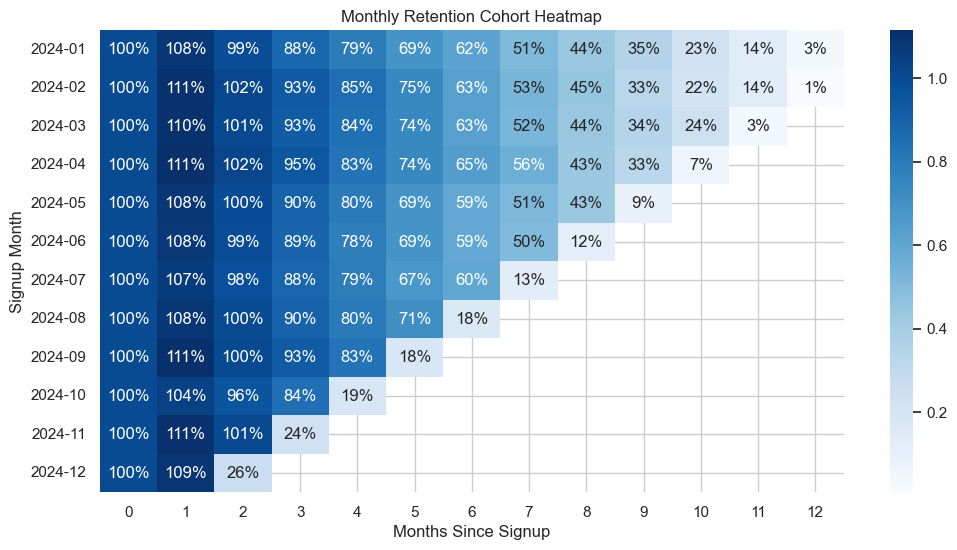

In [21]:
plt.figure(figsize=(12,6))
sns.heatmap(cohort_retention, annot=True, fmt=".0%", cmap="Blues")
plt.title("Monthly Retention Cohort Heatmap")
plt.xlabel("Months Since Signup")
plt.ylabel("Signup Month")
plt.show()


In [22]:
# D30 = user active 30 days after signup
daily["days_since_signup"] = (
    daily["date"] - users.set_index("user_id")["signup_date"]
).dt.days

d30 = daily[daily["days_since_signup"] == 30]["user_id"].nunique()
total = users["user_id"].nunique()

d30_retention_rate = d30 / total
print(f"D30 Retention: {d30_retention_rate:.2%}")


D30 Retention: 0.24%


In [23]:
d30_persona = (
    daily[daily["days_since_signup"] == 30]
    .merge(users[["user_id", "persona_type"]], on="user_id")
    .groupby("persona_type")["user_id"]
    .nunique()
)

signup_persona = users.groupby("persona_type")["user_id"].nunique()

d30_persona_retention = (d30_persona / signup_persona).fillna(0)
d30_persona_retention


persona_type
Creator               0.003275
SMBOwner              0.001900
SocialMediaManager    0.002027
Student               0.002345
Name: user_id, dtype: float64

In [24]:
d30_channel = (
    daily[daily["days_since_signup"] == 30]
    .merge(users[["user_id", "acquisition_channel"]], on="user_id")
    .groupby("acquisition_channel")["user_id"]
    .nunique()
)

signup_channel = users.groupby("acquisition_channel")["user_id"].nunique()

d30_channel_retention = (d30_channel / signup_channel).fillna(0)
d30_channel_retention


acquisition_channel
Email         0.001980
Organic       0.002274
PaidSocial    0.001329
Referral      0.003841
SEO           0.002545
Name: user_id, dtype: float64

In [25]:
d30_device = (
    daily[daily["days_since_signup"] == 30]
    .merge(users[["user_id", "device_primary"]], on="user_id")
    .groupby("device_primary")["user_id"]
    .nunique()
)

signup_device = users.groupby("device_primary")["user_id"].nunique()

d30_device_retention = (d30_device / signup_device).fillna(0)
d30_device_retention


device_primary
Android    0.002513
Web        0.001796
iOS        0.003564
Name: user_id, dtype: float64

In [26]:
feature_summary = {
    "Total Designs": len(designs),
    "Users with at least 1 design": designs["user_id"].nunique(),
    "Template Usage Rate": designs["template_used"].mean(),
    "AI Tool Usage Rate": (designs["ai_tool_used"].notna().mean()),
    "Brand Kit Usage Rate": designs["brand_kit_used"].mean(),
    "Collaboration Usage Rate": designs["has_collaborators"].mean(),
    "Export Rate": designs["exported"].mean()
}

pd.DataFrame.from_dict(feature_summary, orient='index', columns=["Value"])


,Value
Total Designs,74051.000000
Users with at least 1 design,10000.000000
Template Usage Rate,0.850481
AI Tool Usage Rate,0.399995
Brand Kit Usage Rate,0.322764
Collaboration Usage Rate,0.091153
Export Rate,0.698735


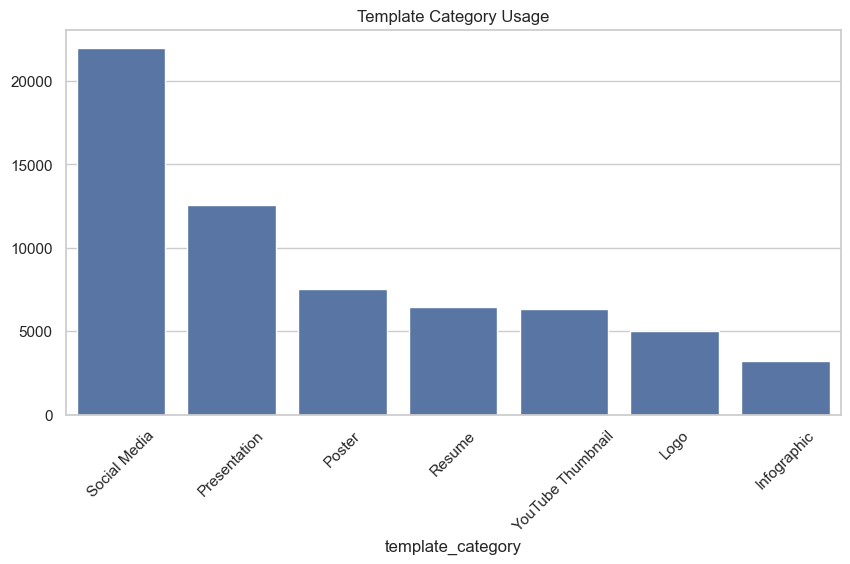

In [27]:
template_popularity = designs["template_category"].value_counts()

plt.figure(figsize=(10,5))
sns.barplot(x=template_popularity.index, y=template_popularity.values)
plt.title("Template Category Usage")
plt.xticks(rotation=45)
plt.show()


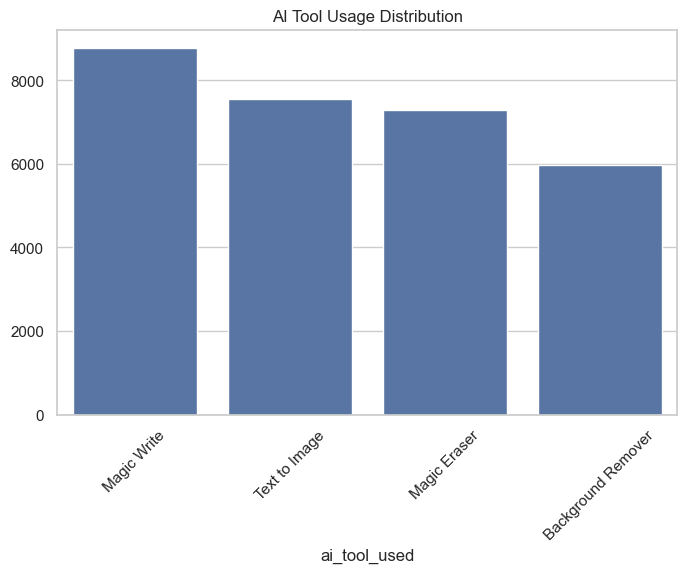

In [28]:
ai_usage = designs["ai_tool_used"].value_counts()

plt.figure(figsize=(8,5))
sns.barplot(x=ai_usage.index, y=ai_usage.values)
plt.title("AI Tool Usage Distribution")
plt.xticks(rotation=45)
plt.show()


In [29]:
ai_persona = (
    designs[designs["ai_tool_used"].notna()]
    .merge(users[["user_id", "persona_type"]], on="user_id")
    .groupby("persona_type")["ai_tool_used"].count()
    / users.groupby("persona_type")["user_id"].count()
)

ai_persona


persona_type
Creator               4.575522
SMBOwner              2.831829
SocialMediaManager    3.844345
Student               1.004020
dtype: float64

In [30]:
bk_usage = designs.groupby("user_id")["brand_kit_used"].mean().reset_index()

bk_merged = bk_usage.merge(users[["user_id", "persona_type"]], on="user_id")

bk_summary = bk_merged.groupby("persona_type")["brand_kit_used"].mean()
bk_summary


persona_type
Creator               0.348735
SMBOwner              0.346328
SocialMediaManager    0.347969
Student               0.100530
Name: brand_kit_used, dtype: float64

In [31]:
collab_rate = (
    designs.groupby("user_id")["has_collaborators"].mean()
    .reset_index()
    .merge(users[["user_id", "persona_type"]], on="user_id")
    .groupby("persona_type")["has_collaborators"].mean()
)

collab_rate


persona_type
Creator               0.093371
SMBOwner              0.091354
SocialMediaManager    0.089618
Student               0.091429
Name: has_collaborators, dtype: float64

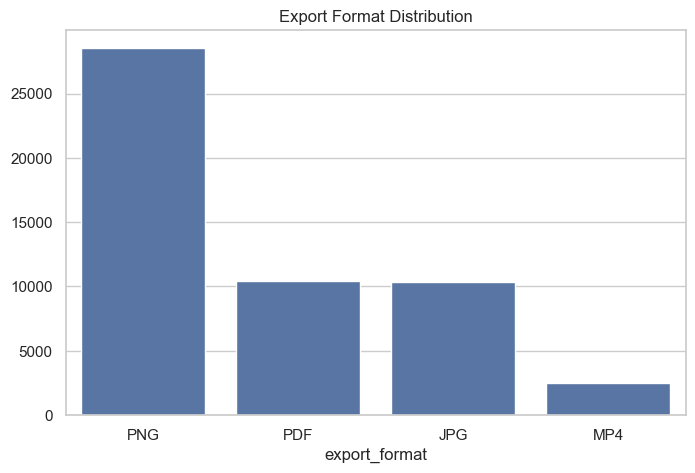

In [32]:
export_formats = designs["export_format"].value_counts()

plt.figure(figsize=(8,5))
sns.barplot(x=export_formats.index, y=export_formats.values)
plt.title("Export Format Distribution")
plt.show()


In [33]:
export_persona = (
    designs.groupby("user_id")["exported"].mean()
    .reset_index()
    .merge(users[["user_id", "persona_type"]], on="user_id")
    .groupby("persona_type")["exported"].mean()
)

export_persona


persona_type
Creator               0.696258
SMBOwner              0.700147
SocialMediaManager    0.700901
Student               0.696622
Name: exported, dtype: float64

In [34]:
user_feature = (
    designs.groupby("user_id")
    .agg({
        "exported": "mean",
        "template_used": "mean",
        "brand_kit_used": "mean",
        "has_collaborators": "mean",
        "ai_tool_used": lambda x: x.notna().mean()
    })
    .reset_index()
)

merged_ret = users.merge(user_feature, on="user_id", how="left")

merged_ret.groupby("status")[["exported","ai_tool_used","brand_kit_used","template_used","has_collaborators"]].mean()


,exported,ai_tool_used,brand_kit_used,template_used,has_collaborators
status,,,,,
Active,0.699726,0.403303,0.277620,0.847599,0.093030
Churned,0.692157,0.396061,0.259903,0.861434,0.094775
Dormant,0.704407,0.402190,0.275544,0.846263,0.085781
Reactivated,0.673909,0.397250,0.264096,0.845336,0.084990


In [35]:
total_revenue = subs["amount_paid"].sum()
paying_users = subs[subs["amount_paid"] > 0]["user_id"].nunique()
total_users = users["user_id"].nunique()

arpu = total_revenue / total_users
arppu = total_revenue / paying_users

print(f"Total Revenue: ${total_revenue:,.2f}")
print(f"Paying Users: {paying_users}")
print(f"ARPU: ${arpu:.2f}")
print(f"ARPPU: ${arppu:.2f}")


Total Revenue: $215,145.00
Paying Users: 4218
ARPU: $21.51
ARPPU: $51.01


In [36]:
plan_counts = subs["plan_type"].value_counts()
plan_counts


plan_type
Free           5782
Pro Monthly    2301
Pro Yearly      972
Teams           945
Name: count, dtype: int64

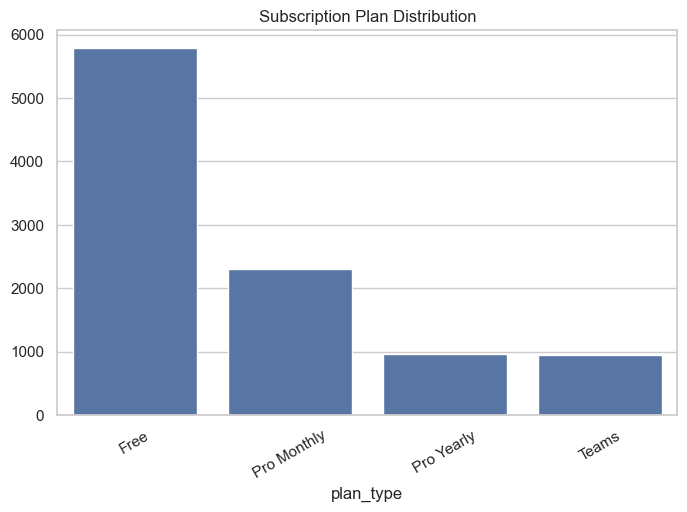

In [37]:
plt.figure(figsize=(8,5))
sns.barplot(x=plan_counts.index, y=plan_counts.values)
plt.title("Subscription Plan Distribution")
plt.xticks(rotation=30)
plt.show()


In [38]:
revenue_by_plan = subs.groupby("plan_type")["amount_paid"].sum()
revenue_by_plan


plan_type
Free                0.0
Pro Monthly     34515.0
Pro Yearly     145800.0
Teams           34830.0
Name: amount_paid, dtype: float64

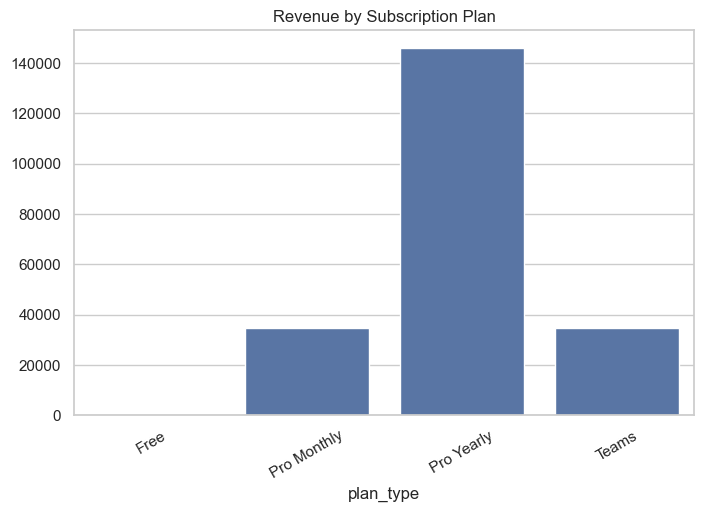

In [39]:
plt.figure(figsize=(8,5))
sns.barplot(x=revenue_by_plan.index, y=revenue_by_plan.values)
plt.title("Revenue by Subscription Plan")
plt.xticks(rotation=30)
plt.show()


In [40]:
subs_persona = subs.merge(users[["user_id","persona_type"]], on="user_id")

revenue_by_persona = subs_persona.groupby("persona_type")["amount_paid"].sum()
revenue_by_persona


persona_type
Creator               50445.0
SMBOwner              84120.0
SocialMediaManager    76110.0
Student                4470.0
Name: amount_paid, dtype: float64

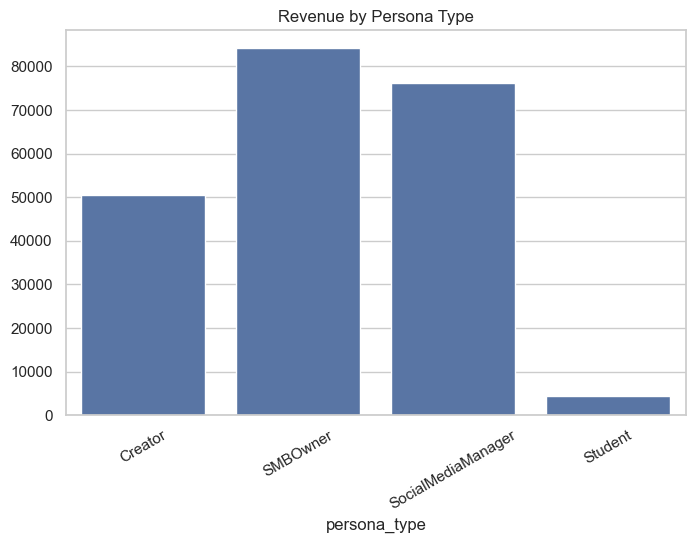

In [41]:
plt.figure(figsize=(8,5))
sns.barplot(x=revenue_by_persona.index, y=revenue_by_persona.values)
plt.title("Revenue by Persona Type")
plt.xticks(rotation=30)
plt.show()


In [42]:
paying_users = subs[subs["amount_paid"] > 0]["user_id"].nunique()
conversion_rate = paying_users / len(users)

print(f"Paying User Conversion Rate: {conversion_rate:.2%}")


Paying User Conversion Rate: 42.18%


In [43]:
churned_paid = subs[(subs["subscription_end"].notna()) & (subs["amount_paid"] > 0)]["user_id"].nunique()
active_paid = subs[(subs["subscription_end"].isna()) & (subs["amount_paid"] > 0)]["user_id"].nunique()

churn_rate = churned_paid / (churned_paid + active_paid)

print(f"Paid User Churn Rate: {churn_rate:.2%}")


Paid User Churn Rate: 33.36%


In [44]:
churn_reasons = subs["churn_reason"].value_counts()
churn_reasons



churn_reason
Low usage         459
Price too high    402
Switched tool     274
Temporary need    140
Billing issue     132
Name: count, dtype: int64

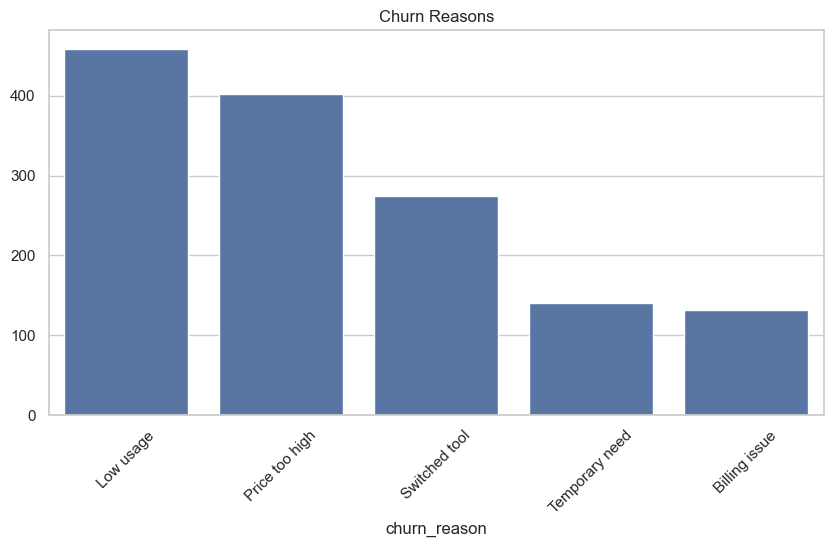

In [45]:
plt.figure(figsize=(10,5))
sns.barplot(x=churn_reasons.index, y=churn_reasons.values)
plt.title("Churn Reasons")
plt.xticks(rotation=45)
plt.show()


In [46]:
user_features = (
    designs.groupby("user_id")
    .agg({
        "exported": "mean",
        "brand_kit_used": "mean",
        "ai_tool_used": lambda x: x.notna().mean()
    })
    .reset_index()
)

rev = subs.groupby("user_id")["amount_paid"].sum().reset_index()

merged_rev = users.merge(user_features, on="user_id", how="left").merge(rev, on="user_id", how="left")
merged_rev["amount_paid"] = merged_rev["amount_paid"].fillna(0)

merged_rev[["exported", "brand_kit_used", "ai_tool_used", "amount_paid"]].corr()


,exported,brand_kit_used,ai_tool_used,amount_paid
exported,1.000000,0.002437,-0.006521,-0.008144
brand_kit_used,0.002437,1.000000,-0.001706,0.152487
ai_tool_used,-0.006521,-0.001706,1.000000,-0.001932
amount_paid,-0.008144,0.152487,-0.001932,1.000000


In [47]:
total_referrals = referrals.shape[0]
accepted_referrals = referrals[referrals["referral_status"] == "Accepted"].shape[0]

acceptance_rate = accepted_referrals / total_referrals if total_referrals > 0 else 0

print("Total Referrals Sent:", total_referrals)
print("Referrals Accepted:", accepted_referrals)
print(f"Referral Acceptance Rate: {acceptance_rate:.2%}")


Total Referrals Sent: 5587
Referrals Accepted: 3121
Referral Acceptance Rate: 55.86%


In [48]:
channel_counts = referrals["referral_channel"].value_counts()
channel_counts


referral_channel
Link            2233
WhatsApp        1121
Email            850
Instagram DM     803
Team Invite      580
Name: count, dtype: int64

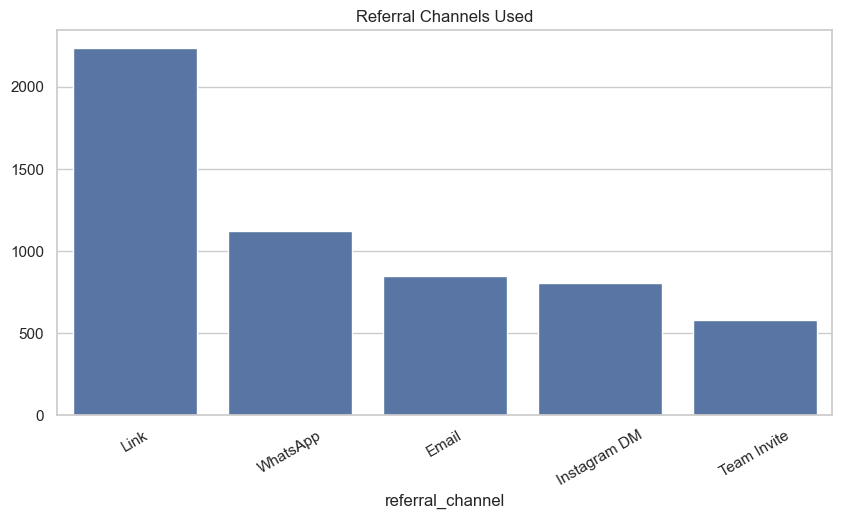

In [49]:
plt.figure(figsize=(10,5))
sns.barplot(x=channel_counts.index, y=channel_counts.values)
plt.title("Referral Channels Used")
plt.xticks(rotation=30)
plt.show()


In [50]:
referrals["accepted"] = referrals["referral_status"] == "Accepted"

channel_accept = referrals.groupby("referral_channel")["accepted"].mean()
channel_accept


referral_channel
Email           0.535294
Instagram DM    0.562889
Link            0.569189
Team Invite     0.563793
WhatsApp        0.549509
Name: accepted, dtype: float64

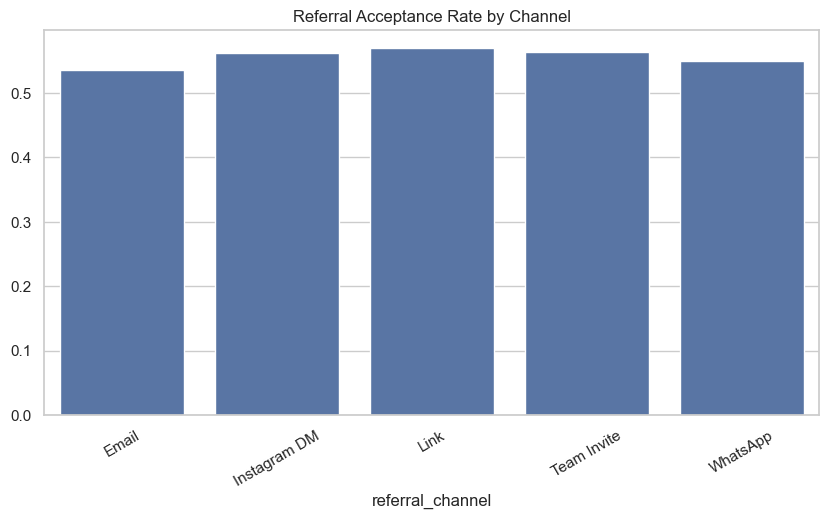

In [51]:
plt.figure(figsize=(10,5))
sns.barplot(x=channel_accept.index, y=channel_accept.values)
plt.title("Referral Acceptance Rate by Channel")
plt.xticks(rotation=30)
plt.show()


In [52]:
ref_user_map = referrals.merge(users[["user_id","persona_type"]], left_on="referrer_user_id", right_on="user_id")

referrals_per_persona = ref_user_map.groupby("persona_type")["referral_id"].count()
referrals_per_persona


persona_type
Creator               2223
SMBOwner              1161
SocialMediaManager    1528
Student                675
Name: referral_id, dtype: int64

In [53]:
accept_by_persona = ref_user_map.groupby("persona_type")["accepted"].mean()
accept_by_persona


persona_type
Creator               0.548358
SMBOwner              0.571059
SocialMediaManager    0.571990
Student               0.540741
Name: accepted, dtype: float64

In [54]:
reward_counts = referrals["reward_granted"].value_counts(dropna=True)
reward_counts


reward_granted
1 month Pro        1606
Credit Pack         879
Template Unlock     636
Name: count, dtype: int64

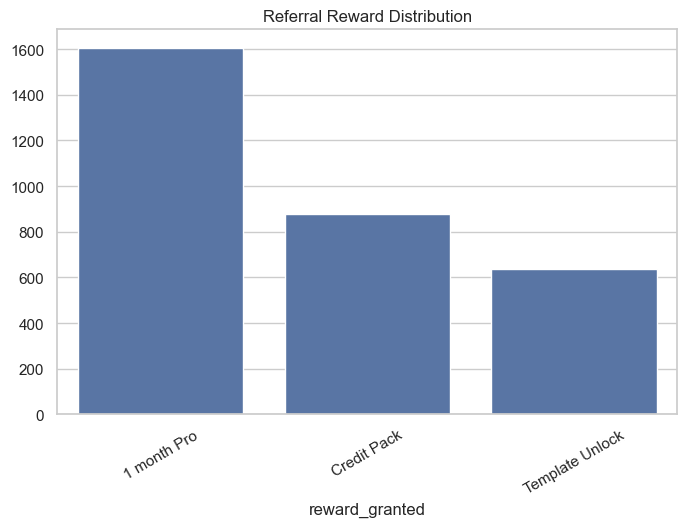

In [55]:
plt.figure(figsize=(8,5))
sns.barplot(x=reward_counts.index, y=reward_counts.values)
plt.title("Referral Reward Distribution")
plt.xticks(rotation=30)
plt.show()


In [56]:
referrers = referrals["referrer_user_id"].nunique()
new_users_from_referrals = referrals[referrals["referral_status"] == "Accepted"].shape[0]

k_factor = new_users_from_referrals / referrers if referrers > 0 else 0
print(f"K-factor: {k_factor:.3f}")


K-factor: 1.641


In [57]:
accepted = referrals[referrals["referral_status"] == "Accepted"]
accepted_users = accepted["referral_accepted_date"].count()


In [58]:
referred_users = users[users["acquisition_channel"] == "Referral"]

referred_activation_rate = referred_users["first_activation_date"].notna().mean()
print(f"Referred User Activation Rate: {referred_activation_rate:.2%}")


Referred User Activation Rate: 63.96%


In [59]:
overall_activation = users["first_activation_date"].notna().mean()
print(f"Overall Activation Rate: {overall_activation:.2%}")


Overall Activation Rate: 64.91%


In [61]:
# SECTION 7: Experiments & A/B Tests

import pandas as pd
import matplotlib.pyplot as plt

# If you already imported matplotlib/pandas above, this is harmless
exp_df = pd.read_csv("../data/experiments_ab_tests.csv", parse_dates=["assigned_date"])

exp_df.head()


,experiment_id,experiment_name,user_id,variant,assigned_date,activated_within_24h,d7_retained,d30_retained,designs_created_30d,exports_30d,revenue_30d
0,EXP001,Onboarding Template Recommendation,1,B,2024-02-02,1,0,0,4,1,0.00
1,EXP002,Export CTA Redesign,1,A,2024-02-02,0,0,0,2,3,0.00
2,EXP001,Onboarding Template Recommendation,2,B,2024-10-09,0,0,0,9,2,19.03
3,EXP002,Export CTA Redesign,2,A,2024-10-09,1,1,0,1,3,17.36
4,EXP001,Onboarding Template Recommendation,3,C,2024-08-26,1,1,1,8,1,12.34


In [62]:
exp_summary = (
    exp_df
    .groupby(["experiment_id", "experiment_name", "variant"])
    .agg(
        users=("user_id", "nunique"),
        activation_rate=("activated_within_24h", "mean"),
        d7_retention=("d7_retained", "mean"),
        d30_retention=("d30_retained", "mean"),
        avg_designs=("designs_created_30d", "mean"),
        avg_exports=("exports_30d", "mean"),
        arpu_30d=("revenue_30d", "mean")
    )
    .reset_index()
)

exp_summary


,experiment_id,experiment_name,variant,users,activation_rate,d7_retention,d30_retention,avg_designs,avg_exports,arpu_30d
0,EXP001,Onboarding Template Recommendation,A,4952,0.497173,0.201333,0.108845,5.084006,1.972940,9.194085
1,EXP001,Onboarding Template Recommendation,B,3059,0.590389,0.225237,0.127166,4.996731,1.996404,10.301121
2,EXP001,Onboarding Template Recommendation,C,1989,0.603318,0.223731,0.137758,5.310709,2.034691,10.848698
3,EXP002,Export CTA Redesign,A,5987,0.484049,0.199599,0.109905,5.020879,1.983965,9.133606
4,EXP002,Export CTA Redesign,B,4013,0.593571,0.227261,0.124097,5.039372,1.995764,10.463975


In [63]:
summary_pretty = exp_summary.copy()

for col in ["activation_rate", "d7_retention", "d30_retention"]:
    summary_pretty[col] = (summary_pretty[col] * 100).round(1).astype(str) + "%"

summary_pretty["avg_designs"] = summary_pretty["avg_designs"].round(2)
summary_pretty["avg_exports"] = summary_pretty["avg_exports"].round(2)
summary_pretty["arpu_30d"] = summary_pretty["arpu_30d"].round(2)

summary_pretty


,experiment_id,experiment_name,variant,users,activation_rate,d7_retention,d30_retention,avg_designs,avg_exports,arpu_30d
0,EXP001,Onboarding Template Recommendation,A,4952,49.7%,20.1%,10.9%,5.08,1.97,9.19
1,EXP001,Onboarding Template Recommendation,B,3059,59.0%,22.5%,12.7%,5.00,2.00,10.30
2,EXP001,Onboarding Template Recommendation,C,1989,60.3%,22.4%,13.8%,5.31,2.03,10.85
3,EXP002,Export CTA Redesign,A,5987,48.4%,20.0%,11.0%,5.02,1.98,9.13
4,EXP002,Export CTA Redesign,B,4013,59.4%,22.7%,12.4%,5.04,2.00,10.46


In [64]:
def add_lift(df, metric):
    df = df.copy()
    control = df.loc[df["variant"] == "A", metric].iloc[0]
    df[f"{metric}_lift_abs"] = df[metric] - control
    df[f"{metric}_lift_pct"] = ((df[metric] - control) / control) * 100
    return df

exp_lift = (
    exp_summary
    .groupby("experiment_id", group_keys=False)
    .apply(lambda g: add_lift(add_lift(g, "activation_rate"), "arpu_30d"))
)

exp_lift


C:\Users\Navodya\AppData\Local\Temp\ipykernel_3664\1882674888.py:11: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: add_lift(add_lift(g, "activation_rate"), "arpu_30d"))


,experiment_id,experiment_name,variant,users,activation_rate,d7_retention,d30_retention,avg_designs,avg_exports,arpu_30d,activation_rate_lift_abs,activation_rate_lift_pct,arpu_30d_lift_abs,arpu_30d_lift_pct
0,EXP001,Onboarding Template Recommendation,A,4952,0.497173,0.201333,0.108845,5.084006,1.972940,9.194085,0.000000,0.000000,0.000000,0.000000
1,EXP001,Onboarding Template Recommendation,B,3059,0.590389,0.225237,0.127166,4.996731,1.996404,10.301121,0.093216,18.749245,1.107036,12.040742
2,EXP001,Onboarding Template Recommendation,C,1989,0.603318,0.223731,0.137758,5.310709,2.034691,10.848698,0.106145,21.349796,1.654613,17.996490
3,EXP002,Export CTA Redesign,A,5987,0.484049,0.199599,0.109905,5.020879,1.983965,9.133606,0.000000,0.000000,0.000000,0.000000
4,EXP002,Export CTA Redesign,B,4013,0.593571,0.227261,0.124097,5.039372,1.995764,10.463975,0.109522,22.626258,1.330368,14.565643


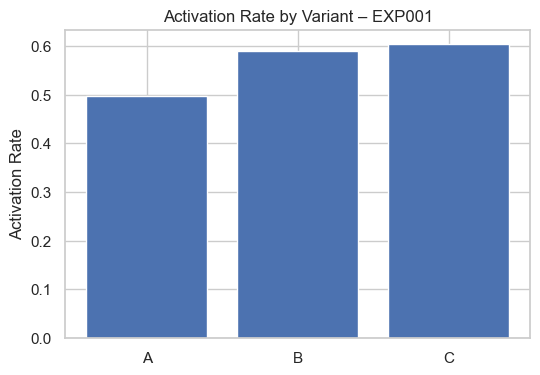

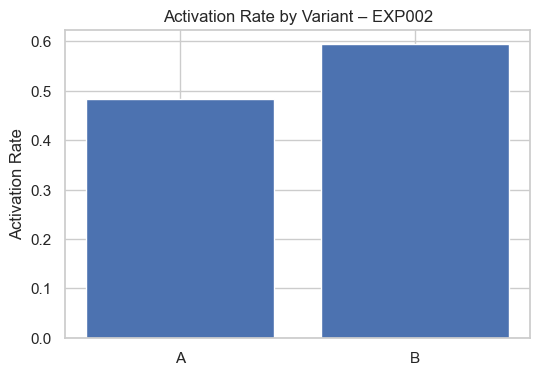

In [65]:
for exp_id, g in exp_summary.groupby("experiment_id"):
    plt.figure(figsize=(6,4))
    plt.bar(g["variant"], g["activation_rate"])
    plt.title(f"Activation Rate by Variant – {exp_id}")
    plt.ylabel("Activation Rate")
    plt.show()


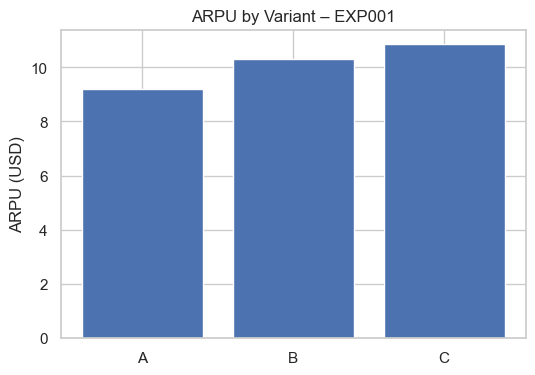

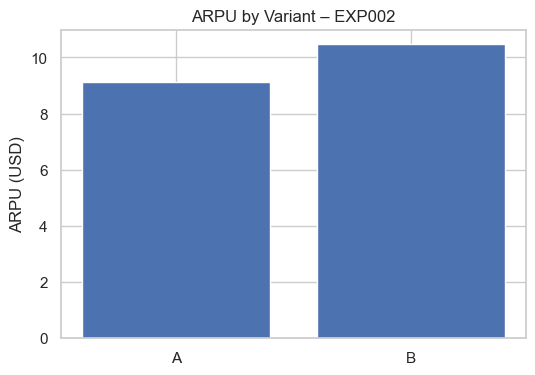

In [66]:
for exp_id, g in exp_summary.groupby("experiment_id"):
    plt.figure(figsize=(6,4))
    plt.bar(g["variant"], g["arpu_30d"])
    plt.title(f"ARPU by Variant – {exp_id}")
    plt.ylabel("ARPU (USD)")
    plt.show()


In [67]:
for exp_id, g in exp_lift.groupby("experiment_id"):
    exp_name = g["experiment_name"].iloc[0]
    print(f"\n=== {exp_id} — {exp_name} ===")
    
    for _, row in g.sort_values("variant").iterrows():
        v = row["variant"]
        
        if v == "A":
            print(f"Variant A (Control): Activation={row['activation_rate']*100:.1f}%, ARPU=${row['arpu_30d']:.2f}")
        else:
            print(
                f"Variant {v}: "
                f"Activation={row['activation_rate']*100:.1f}% "
                f"({row['activation_rate_lift_pct']:+.1f}% vs A), "
                f"ARPU=${row['arpu_30d']:.2f} "
                f"({row['arpu_30d_lift_pct']:+.1f}% vs A)"
            )



=== EXP001 — Onboarding Template Recommendation ===
Variant A (Control): Activation=49.7%, ARPU=$9.19
Variant B: Activation=59.0% (+18.7% vs A), ARPU=$10.30 (+12.0% vs A)
Variant C: Activation=60.3% (+21.3% vs A), ARPU=$10.85 (+18.0% vs A)

=== EXP002 — Export CTA Redesign ===
Variant A (Control): Activation=48.4%, ARPU=$9.13
Variant B: Activation=59.4% (+22.6% vs A), ARPU=$10.46 (+14.6% vs A)


In [69]:
journey = {
    "Signup": users["user_id"].nunique(),
    "Onboarding Completed": events[events["event_name"]=="onboarding_completed"]["user_id"].nunique(),
    "First Design Created": events[events["event_name"]=="first_design_created"]["user_id"].nunique(),
    "Template Applied": events[events["event_name"]=="template_applied"]["user_id"].nunique(),
    "AI Tool Used": events[events["event_name"]=="ai_tool_used"]["user_id"].nunique(),
    "Exported Design": events[events["event_name"]=="design_exported"]["user_id"].nunique(),
    
    # FIX: use active_days instead of active_minutes
    "Repeat Active (7+ days)": daily[daily["active_days"] >= 7]["user_id"].nunique(),
    
    "Became Subscriber": subs[subs["amount_paid"] > 0]["user_id"].nunique(),
    "Sent Referral": referrals["referrer_user_id"].nunique(),
}


KeyError: 'active_days'

In [70]:
daily.columns



Index(['user_id', 'date', 'is_active_d', 'designs_created', 'designs_exported',
       'collaboration_sessions', 'templates_used', 'minutes_spent', 'week',
       'activity_month', 'days_since_signup'],
      dtype='object')

In [71]:
repeat_active_users = (
    daily.groupby("user_id")["is_active_d"]
    .sum()
    .ge(7)     # >= 7 days active
    .sum()
)


In [72]:
journey = {
    "Signup": users["user_id"].nunique(),
    "Onboarding Completed": events[events["event_name"]=="onboarding_completed"]["user_id"].nunique(),
    "First Design Created": events[events["event_name"]=="first_design_created"]["user_id"].nunique(),
    "Template Applied": events[events["event_name"]=="template_applied"]["user_id"].nunique(),
    "AI Tool Used": events[events["event_name"]=="ai_tool_used"]["user_id"].nunique(),
    "Exported Design": events[events["event_name"]=="design_exported"]["user_id"].nunique(),
    "Repeat Active (7+ days)": repeat_active_users,
    "Became Subscriber": subs[subs["amount_paid"] > 0]["user_id"].nunique(),
    "Sent Referral": referrals["referrer_user_id"].nunique(),
}

journey_df = pd.DataFrame.from_dict(journey, orient="index", columns=["Users"])
journey_df


,Users
Signup,10000
Onboarding Completed,6476
First Design Created,6491
Template Applied,0
AI Tool Used,0
Exported Design,4158
Repeat Active (7+ days),8408
Became Subscriber,4218
Sent Referral,1902


In [73]:
journey_df["Dropoff_from_previous"] = journey_df["Users"].pct_change()
journey_df["Dropoff_from_previous"] = journey_df["Dropoff_from_previous"].apply(lambda x: f"{x*100:.1f}%" if pd.notnull(x) else "-")
journey_df


,Users,Dropoff_from_previous
Signup,10000,-
Onboarding Completed,6476,-35.2%
First Design Created,6491,0.2%
Template Applied,0,-100.0%
AI Tool Used,0,-
Exported Design,4158,inf%
Repeat Active (7+ days),8408,102.2%
Became Subscriber,4218,-49.8%
Sent Referral,1902,-54.9%


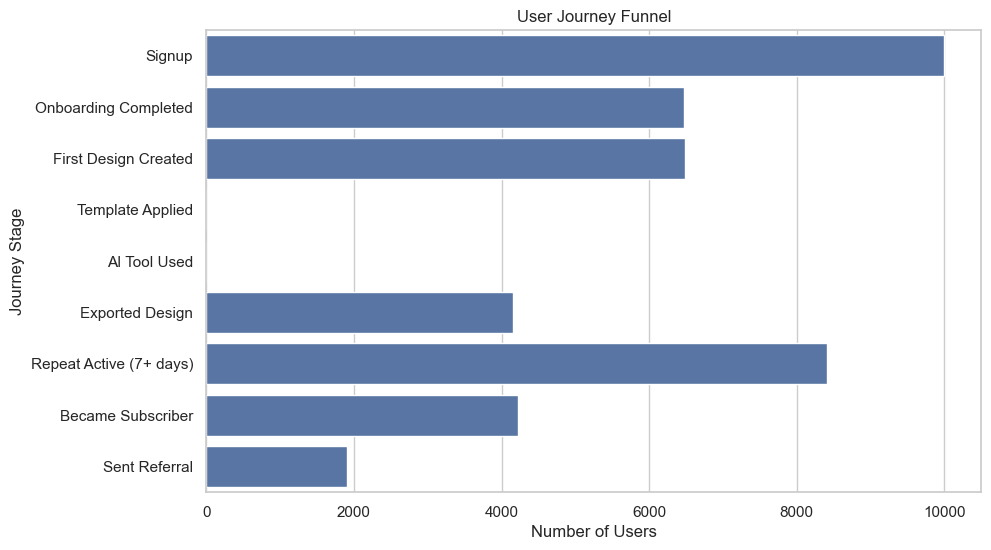

In [74]:
plt.figure(figsize=(10,6))
sns.barplot(y=journey_df.index, x=journey_df["Users"])
plt.title("User Journey Funnel")
plt.xlabel("Number of Users")
plt.ylabel("Journey Stage")
plt.show()


In [75]:
dropoffs = journey_df["Users"].pct_change().fillna(0)
dropoffs.index = journey_df.index

dropoffs


Signup                     0.000000
Onboarding Completed      -0.352400
First Design Created       0.002316
Template Applied          -1.000000
AI Tool Used               0.000000
Exported Design                 inf
Repeat Active (7+ days)    1.022126
Became Subscriber         -0.498335
Sent Referral             -0.549075
Name: Users, dtype: float64

In [76]:
inactive_users = users[users["first_activation_date"].isna()]
inactive_merge = inactive_users.merge(users, on="user_id", suffixes=("","_"))

# Persona-level failure rate
failure_by_persona = (
    inactive_users.groupby("persona_type")["user_id"].nunique() /
    users.groupby("persona_type")["user_id"].nunique()
)

failure_by_persona


persona_type
Creator               0.361032
SMBOwner              0.244181
SocialMediaManager    0.186461
Student               0.553769
Name: user_id, dtype: float64

In [77]:
failure_by_channel = (
    inactive_users.groupby("acquisition_channel")["user_id"].nunique() /
    users.groupby("acquisition_channel")["user_id"].nunique()
)

failure_by_channel


acquisition_channel
Email         0.353465
Organic       0.353714
PaidSocial    0.338206
Referral      0.360435
SEO           0.346056
Name: user_id, dtype: float64

In [78]:
failure_by_device = (
    inactive_users.groupby("device_primary")["user_id"].nunique() /
    users.groupby("device_primary")["user_id"].nunique()
)

failure_by_device


device_primary
Android    0.350182
Web        0.353086
iOS        0.347251
Name: user_id, dtype: float64

In [79]:
low_retention_by_persona = d30_persona_retention.sort_values()
low_retention_by_persona


persona_type
SMBOwner              0.001900
SocialMediaManager    0.002027
Student               0.002345
Creator               0.003275
Name: user_id, dtype: float64

In [80]:
low_retention_by_channel = d30_channel_retention.sort_values()
low_retention_by_channel


acquisition_channel
PaidSocial    0.001329
Email         0.001980
Organic       0.002274
SEO           0.002545
Referral      0.003841
Name: user_id, dtype: float64

In [82]:
low_retention_by_device = d30_device_retention.sort_values()


In [83]:
print(low_retention_by_device)


device_primary
Web        0.001796
Android    0.002513
iOS        0.003564
Name: user_id, dtype: float64


In [84]:
export_fail = (
    designs.groupby("user_id")["exported"].mean()
    .reset_index()
    .merge(users[["user_id","persona_type","acquisition_channel","device_primary"]], on="user_id")
)

export_by_persona = export_fail.groupby("persona_type")["exported"].mean().sort_values()
export_by_persona


persona_type
Creator               0.696258
Student               0.696622
SMBOwner              0.700147
SocialMediaManager    0.700901
Name: exported, dtype: float64

In [85]:
export_by_channel = export_fail.groupby("acquisition_channel")["exported"].mean().sort_values()


In [86]:
print(export_by_channel)

acquisition_channel
SEO           0.693072
Referral      0.694234
Email         0.696372
PaidSocial    0.696711
Organic       0.703674
Name: exported, dtype: float64


In [87]:
export_by_device = export_fail.groupby("device_primary")["exported"].mean().sort_values()
print(export_by_device)

device_primary
Android    0.693440
Web        0.699378
iOS        0.704873
Name: exported, dtype: float64


In [88]:
rca_fishbone = {
    "User": ["Low skill", "Low motivation", "Wrong persona-channel match"],
    "Product": ["Weak onboarding", "Poor template discovery", "Hidden export CTA"],
    "Design": ["Cluttered UI", "Too many choices", "Low value visibility"],
    "Technical": ["Slow load", "Device-specific bugs", "Export failures"],
    "Market": ["Student-heavy audience", "Low willingness to pay"],
    "Process": ["No personalized paths", "Weak recommendation engine"],
}

rca_fishbone


{'User': ['Low skill', 'Low motivation', 'Wrong persona-channel match'],
 'Product': ['Weak onboarding',
  'Poor template discovery',
  'Hidden export CTA'],
 'Design': ['Cluttered UI', 'Too many choices', 'Low value visibility'],
 'Technical': ['Slow load', 'Device-specific bugs', 'Export failures'],
 'Market': ['Student-heavy audience', 'Low willingness to pay'],
 'Process': ['No personalized paths', 'Weak recommendation engine']}

In [89]:
merged_ret = merged_ret.fillna(0)

merged_ret[[
    "exported",
    "ai_tool_used",
    "brand_kit_used",
    "template_used",
    "has_collaborators",
    "days_since_signup"
]].corrwith(merged_ret["amount_paid"]).sort_values()


KeyError: "['days_since_signup'] not in index"

In [90]:
user_features = (
    designs.groupby("user_id")
    .agg({
        "exported": "mean",
        "brand_kit_used": "mean",
        "has_collaborators": "mean",
        "template_used": "mean",
        "ai_tool_used": lambda x: x.notna().mean()
    })
    .reset_index()
)



In [91]:
user_revenue = subs.groupby("user_id")["amount_paid"].sum().reset_index()


In [92]:
user_days = daily.groupby("user_id")["days_since_signup"].max().reset_index()


In [93]:
merged_ret = (
    users[["user_id"]]               # base
    .merge(user_features, on="user_id", how="left")
    .merge(user_revenue, on="user_id", how="left")
    .merge(user_days, on="user_id", how="left")
)


In [94]:
merged_ret = merged_ret.fillna(0)


In [95]:
correlation_result = merged_ret[[
    "exported",
    "ai_tool_used",
    "brand_kit_used",
    "template_used",
    "has_collaborators",
    "days_since_signup"
]].corrwith(merged_ret["amount_paid"]).sort_values()

correlation_result


exported            -0.008144
has_collaborators   -0.004389
ai_tool_used        -0.001932
template_used        0.003212
days_since_signup    0.010617
brand_kit_used       0.152487
dtype: float64

In [96]:
rca_fishbone = {
    "User": ["Low skill", "Low motivation", "Wrong persona-channel match"],
    "Product": ["Weak onboarding", "Poor template discovery", "Hidden export CTA"],
    "Design": ["Cluttered UI", "Too many choices", "Low value visibility"],
    "Technical": ["Slow load", "Device-specific bugs", "Export failures"],
    "Market": ["Student-heavy audience", "Low willingness to pay"],
    "Process": ["No personalized paths", "Weak recommendation engine"],
}

rca_fishbone


{'User': ['Low skill', 'Low motivation', 'Wrong persona-channel match'],
 'Product': ['Weak onboarding',
  'Poor template discovery',
  'Hidden export CTA'],
 'Design': ['Cluttered UI', 'Too many choices', 'Low value visibility'],
 'Technical': ['Slow load', 'Device-specific bugs', 'Export failures'],
 'Market': ['Student-heavy audience', 'Low willingness to pay'],
 'Process': ['No personalized paths', 'Weak recommendation engine']}

In [97]:
merged_ret = merged_ret.fillna(0)

merged_ret[[
    "exported",
    "ai_tool_used",
    "brand_kit_used",
    "template_used",
    "has_collaborators",
    "days_since_signup"
]].corrwith(merged_ret["amount_paid"]).sort_values()


exported            -0.008144
has_collaborators   -0.004389
ai_tool_used        -0.001932
template_used        0.003212
days_since_signup    0.010617
brand_kit_used       0.152487
dtype: float64

In [1]:
# Ensure subscription dataset is loaded
subs_df = subs.copy()

# Convert dates
subs_df["subscription_start"] = pd.to_datetime(subs_df["subscription_start"], errors="coerce")
subs_df["subscription_end"] = pd.to_datetime(subs_df["subscription_end"], errors="coerce")

subs_df.head()


NameError: name 'subs' is not defined

In [2]:
import pandas as pd

# Load all datasets you need for Revenue Section
users = pd.read_csv("../data/users.csv", parse_dates=["signup_date", "first_activation_date"])
subs = pd.read_csv("../data/subscriptions_payments.csv", parse_dates=["subscription_start", "subscription_end"])
daily = pd.read_csv("../data/daily_user_activity.csv", parse_dates=["date"])
designs = pd.read_csv("../data/designs_features.csv")
referrals = pd.read_csv("../data/referrals.csv", parse_dates=["referral_sent_date", "referral_accepted_date"])
events = pd.read_csv("../data/user_journey_events.csv", parse_dates=["event_timestamp"])


C:\Users\Navodya\AppData\Local\Temp\ipykernel_3408\352783196.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  users = pd.read_csv("../data/users.csv", parse_dates=["signup_date", "first_activation_date"])


In [4]:

# Ensure subscription dataset is loaded
subs_df = subs.copy()

# Convert dates
subs_df["subscription_start"] = pd.to_datetime(subs_df["subscription_start"], errors="coerce")
subs_df["subscription_end"] = pd.to_datetime(subs_df["subscription_end"], errors="coerce")

subs_df.head()

,user_id,plan_type,subscription_start,subscription_end,is_active_subscription,billing_period,amount_paid,currency,upgrade_from,downgrade_to,churn_reason
0,1,Free,2024-02-02,NaT,0,NaN,0.0,USD,NaN,NaN,NaN
1,2,Pro Monthly,2024-10-30,NaT,1,Monthly,15.0,USD,NaN,NaN,NaN
2,3,Teams,2024-10-04,NaT,1,Monthly,30.0,USD,NaN,NaN,NaN
3,4,Free,2024-06-09,NaT,0,NaN,0.0,USD,NaN,NaN,NaN
4,5,Free,2024-06-07,NaT,0,NaN,0.0,USD,NaN,NaN,NaN


In [5]:
total_revenue = subs_df["amount_paid"].sum()
monthly_revenue = subs_df.groupby(subs_df["subscription_start"].dt.to_period("M"))["amount_paid"].sum()

print("Total Revenue: $", round(total_revenue, 2))
monthly_revenue


Total Revenue: $ 215145.0


subscription_start
2024-01     4500.0
2024-02    14280.0
2024-03    18630.0
2024-04    19080.0
2024-05    18435.0
2024-06    16710.0
2024-07    21015.0
2024-08    20370.0
2024-09    17295.0
2024-10    17160.0
2024-11    17805.0
2024-12    16995.0
2025-01    11820.0
2025-02     1050.0
Freq: M, Name: amount_paid, dtype: float64

In [6]:
total_users = users["user_id"].nunique()
paying_users = subs_df[subs_df["amount_paid"] > 0]["user_id"].nunique()

ARPU = total_revenue / total_users
ARPPU = total_revenue / paying_users
paying_conversion = paying_users / total_users

print(f"ARPU: ${ARPU:.2f}")
print(f"ARPPU: ${ARPPU:.2f}")
print(f"Paying Conversion Rate: {paying_conversion:.2%}")


ARPU: $21.51
ARPPU: $51.01
Paying Conversion Rate: 42.18%


In [7]:
revenue_by_plan = subs_df.groupby("plan_type")["amount_paid"].sum().sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=revenue_by_plan.index, y=revenue_by_plan.values)
plt.title("Revenue by Subscription Plan")
plt.xticks(rotation=45)
plt.show()

revenue_by_plan


NameError: name 'plt' is not defined

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


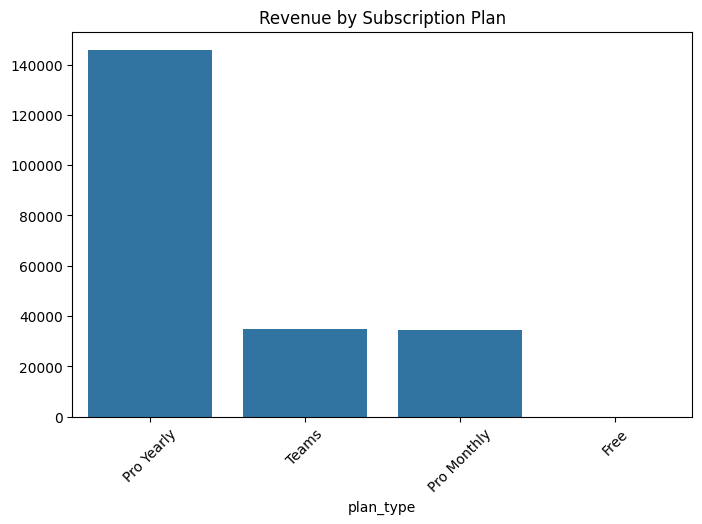

plan_type
Pro Yearly     145800.0
Teams           34830.0
Pro Monthly     34515.0
Free                0.0
Name: amount_paid, dtype: float64

In [9]:
revenue_by_plan = subs_df.groupby("plan_type")["amount_paid"].sum().sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=revenue_by_plan.index, y=revenue_by_plan.values)
plt.title("Revenue by Subscription Plan")
plt.xticks(rotation=45)
plt.show()

revenue_by_plan


In [10]:
subs_df["is_active"] = subs_df["subscription_end"].isna()

active_subscribers = subs_df[subs_df["is_active"]==True]["user_id"].nunique()
churned_subscribers = subs_df[subs_df["is_active"]==False]["user_id"].nunique()

churn_rate = churned_subscribers / (active_subscribers + churned_subscribers)

print(f"Active Subscribers: {active_subscribers}")
print(f"Churned Subscribers: {churned_subscribers}")
print(f"Subscriber Churn Rate: {churn_rate:.2%}")


Active Subscribers: 8593
Churned Subscribers: 1407
Subscriber Churn Rate: 14.07%


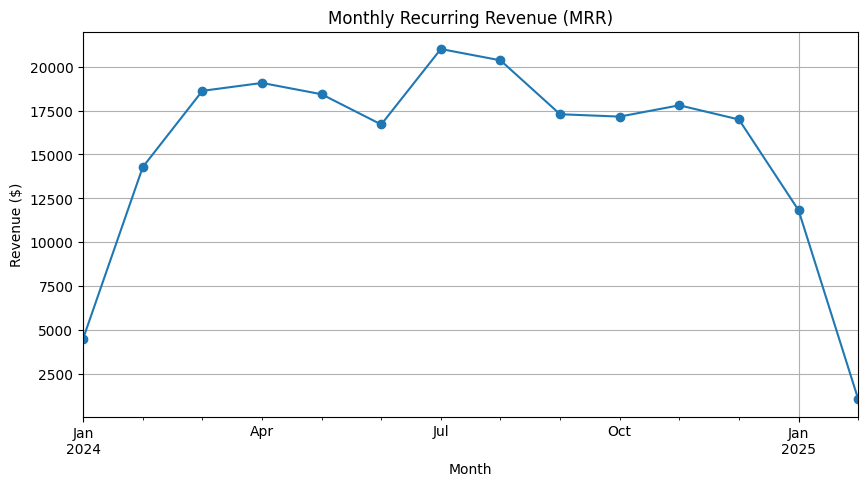

month
2024-01     4500.0
2024-02    14280.0
2024-03    18630.0
2024-04    19080.0
2024-05    18435.0
2024-06    16710.0
2024-07    21015.0
2024-08    20370.0
2024-09    17295.0
2024-10    17160.0
2024-11    17805.0
2024-12    16995.0
2025-01    11820.0
2025-02     1050.0
Freq: M, Name: amount_paid, dtype: float64

In [11]:
subs_df["month"] = subs_df["subscription_start"].dt.to_period("M")
MRR = subs_df.groupby("month")["amount_paid"].sum()

plt.figure(figsize=(10,5))
MRR.plot(kind="line", marker="o")
plt.title("Monthly Recurring Revenue (MRR)")
plt.xlabel("Month")
plt.ylabel("Revenue ($)")
plt.grid(True)
plt.show()

MRR


In [12]:
# Subscriber lifespan: end date - start date
subs_df["duration_days"] = (subs_df["subscription_end"].fillna(pd.Timestamp.today()) - subs_df["subscription_start"]).dt.days

avg_lifespan_months = subs_df["duration_days"].mean() / 30
LTV_estimate = ARPPU * avg_lifespan_months

print(f"Avg Subscriber Lifespan: {avg_lifespan_months:.2f} months")
print(f"Estimated LTV: ${LTV_estimate:.2f}")


Avg Subscriber Lifespan: 15.47 months
Estimated LTV: $789.03


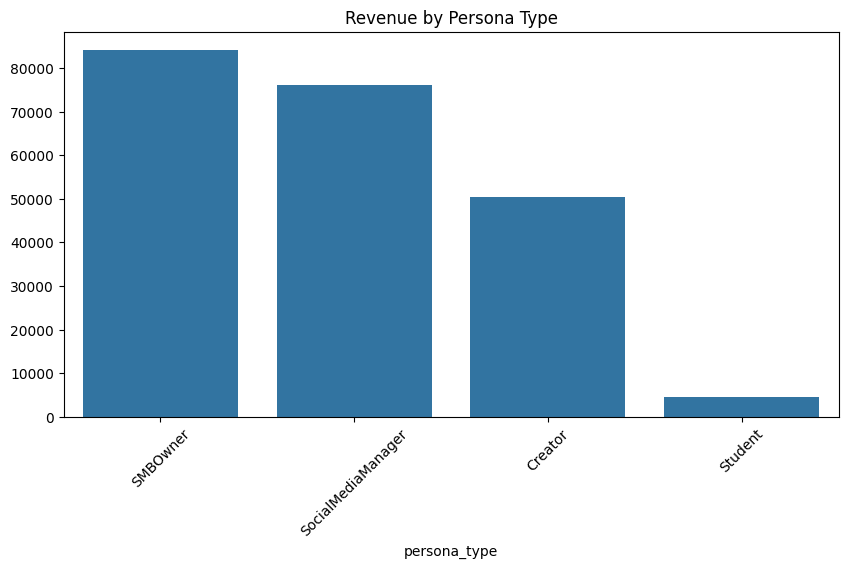

persona_type
SMBOwner              84120.0
SocialMediaManager    76110.0
Creator               50445.0
Student                4470.0
Name: amount_paid, dtype: float64

In [13]:
subs_persona = subs_df.merge(users[["user_id", "persona_type"]], on="user_id")

revenue_by_persona = subs_persona.groupby("persona_type")["amount_paid"].sum().sort_values(ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x=revenue_by_persona.index, y=revenue_by_persona.values)
plt.title("Revenue by Persona Type")
plt.xticks(rotation=45)
plt.show()

revenue_by_persona


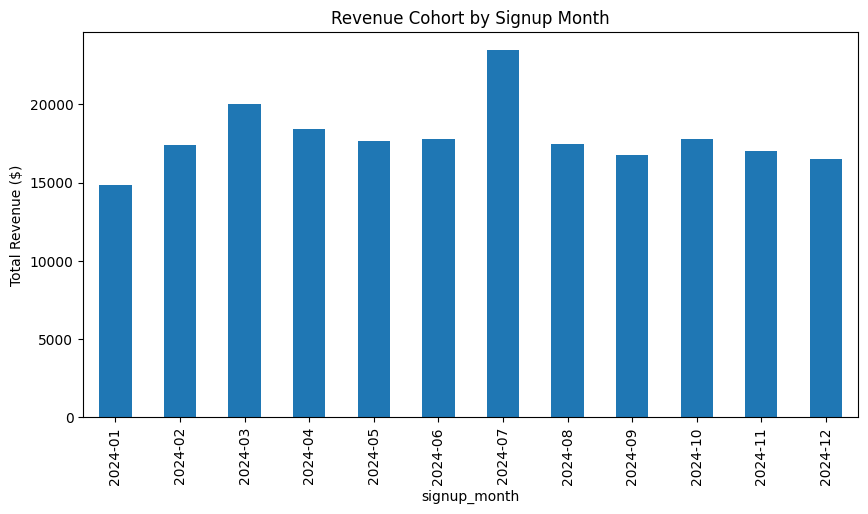

signup_month
2024-01    14820.0
2024-02    17415.0
2024-03    20055.0
2024-04    18405.0
2024-05    17670.0
2024-06    17760.0
2024-07    23460.0
2024-08    17460.0
2024-09    16770.0
2024-10    17805.0
2024-11    17040.0
2024-12    16485.0
Freq: M, Name: amount_paid, dtype: float64

In [14]:
users_cohort = users.copy()
users_cohort["signup_month"] = users["signup_date"].dt.to_period("M")

rev_cohort = subs_df.merge(users_cohort[["user_id","signup_month"]], on="user_id")
cohort_revenue = rev_cohort.groupby("signup_month")["amount_paid"].sum()

plt.figure(figsize=(10,5))
cohort_revenue.plot(kind="bar")
plt.title("Revenue Cohort by Signup Month")
plt.ylabel("Total Revenue ($)")
plt.show()

cohort_revenue


In [15]:
revenue_corr = merged_ret.corrwith(merged_ret["amount_paid"]).sort_values(ascending=False)
revenue_corr


NameError: name 'merged_ret' is not defined

In [16]:
# === REBUILD MERGED_RET ===

# 1. Feature usage per user
user_features = (
    designs.groupby("user_id")
    .agg({
        "exported": "mean",
        "brand_kit_used": "mean",
        "has_collaborators": "mean",
        "template_used": "mean",
        "ai_tool_used": lambda x: x.notna().mean()
    })
    .reset_index()
)

# 2. Revenue per user
user_revenue = subs.groupby("user_id")["amount_paid"].sum().reset_index()

# 3. Days since signup (max per user)
user_days = daily.groupby("user_id")["days_since_signup"].max().reset_index()

# 4. Merge everything into merged_ret
merged_ret = (
    users[["user_id"]]
    .merge(user_features, on="user_id", how="left")
    .merge(user_revenue, on="user_id", how="left")
    .merge(user_days, on="user_id", how="left")
)

# 5. Clean missing values
merged_ret = merged_ret.fillna(0)

print("merged_ret rebuilt successfully")
merged_ret.head()


KeyError: 'Column not found: days_since_signup'

In [17]:
daily.columns.tolist()


['user_id',
 'date',
 'is_active_d',
 'designs_created',
 'designs_exported',
 'collaboration_sessions',
 'templates_used',
 'minutes_spent']

In [18]:
# Re-add days_since_signup to the daily dataset

# Merge signup date into daily activity table
daily = daily.merge(users[["user_id", "signup_date"]], on="user_id", how="left")

# Compute days since signup
daily["days_since_signup"] = (daily["date"] - daily["signup_date"]).dt.days

# Confirm the column now exists
daily[["user_id", "date", "signup_date", "days_since_signup"]].head()


,user_id,date,signup_date,days_since_signup
0,1,2024-02-18,2024-02-02,16
1,1,2024-03-02,2024-02-02,29
2,1,2024-03-17,2024-02-02,44
3,1,2024-03-21,2024-02-02,48
4,1,2024-04-06,2024-02-02,64


In [19]:
# 1. Feature usage per user
user_features = (
    designs.groupby("user_id")
    .agg({
        "exported": "mean",
        "brand_kit_used": "mean",
        "has_collaborators": "mean",
        "template_used": "mean",
        "ai_tool_used": lambda x: x.notna().mean()
    })
    .reset_index()
)

# 2. Revenue per user
user_revenue = subs.groupby("user_id")["amount_paid"].sum().reset_index()

# 3. Days since signup (max per user)
user_days = daily.groupby("user_id")["days_since_signup"].max().reset_index()

# 4. Merge everything
merged_ret = (
    users[["user_id"]]
    .merge(user_features, on="user_id", how="left")
    .merge(user_revenue, on="user_id", how="left")
    .merge(user_days, on="user_id", how="left")
)

merged_ret = merged_ret.fillna(0)

merged_ret.head()


,user_id,exported,brand_kit_used,has_collaborators,template_used,ai_tool_used,amount_paid,days_since_signup
0,1,1.000000,0.500000,0.000000,1.000000,0.500000,0.0,246.0
1,2,0.888889,0.111111,0.111111,0.666667,0.444444,15.0,38.0
2,3,0.800000,0.400000,0.000000,0.800000,0.600000,30.0,55.0
3,4,0.500000,0.000000,0.000000,1.000000,0.500000,0.0,47.0
4,5,0.500000,1.000000,0.000000,1.000000,0.000000,0.0,234.0


In [20]:
revenue_corr = merged_ret.corrwith(merged_ret["amount_paid"]).sort_values(ascending=False)
revenue_corr


amount_paid          1.000000
brand_kit_used       0.152487
days_since_signup    0.019115
user_id              0.005378
template_used        0.003212
ai_tool_used        -0.001932
has_collaborators   -0.004389
exported            -0.008144
dtype: float64

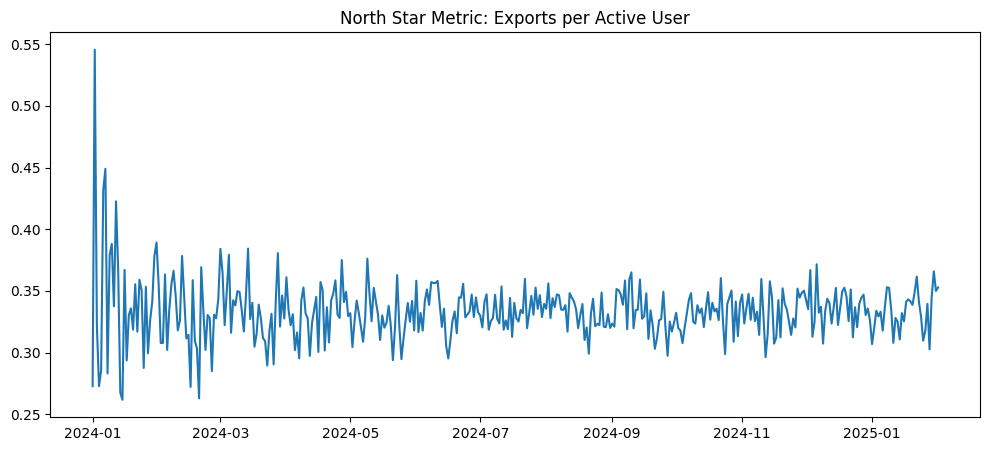

In [23]:
nsm_daily = (
    daily.groupby("date")["designs_exported"].sum() /
    daily.groupby("date")["user_id"].nunique()
)

plt.figure(figsize=(12,5))
plt.plot(nsm_daily.index, nsm_daily.values)
plt.title("North Star Metric: Exports per Active User")
plt.show()
